## Importing the modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


##  Reading in the data

In [3]:
## read the dataset
#raw_data = pd.read_csv('/content/drive/MyDrive/Projects/ML_Bipping_category/combined_populations_based_on_mean.csv')
raw_data = pd.read_csv('/Users/kassywang/Documents/Summer Project/outliers/final_combined_with_classification.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Columns: 616 entries, study_id to ratio_after
dtypes: float64(465), int64(50), object(101)
memory usage: 3.8+ MB


## Data exploration

In [4]:
num_rows, num_columns = raw_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 810
Number of columns: 616


In [5]:
#check the column names
raw_data.columns

Index(['study_id', 'night_records', 'mean_sys_bp_night', 'mean_dias_bp_night',
       'day_records', 'mean_sys_bp_day', 'mean_dias_bp_day', 'day_perc',
       'night_perc', 'day_records_cat',
       ...
       'birthmo', 'birthyr', 'othrelig', 'intdate', 'bleedate', 'seleµgl',
       'match_id', 'calculated_classification', 'ratio_before', 'ratio_after'],
      dtype='object', length=616)

In [6]:
print(raw_data[["ageyrs", "weight", "height", 'hip', 'waist', 'artyrs']].describe().round(3))

       ageyrs   weight   height      hip    waist   artyrs
count  810.00  809.000  807.000  809.000  802.000  661.000
mean    36.56   62.894  161.718   95.212   84.385   77.956
std     11.97   47.800   30.590    9.755   56.977   37.250
min     17.00   38.700  132.000   45.000   57.000    1.000
25%     25.00   53.000  154.900   88.300   73.925   98.000
50%     38.00   59.000  160.000   94.000   79.000   98.000
75%     46.00   66.000  166.700  101.000   87.000   98.000
max     76.00  998.980  998.980  161.000  998.980   98.000


#### **Subsetting particular columns of interest from data**

In [7]:
# Define the list of specific columns
#'age_cat', 'eversmoked'
specific_columns = ['study_id', 'ageyrs','sex', 'finalhiv','artyrs','weight', 'height', 'hip',
                    'waist','cigaever','pipeever', 'tabaever','fruit', 'veg','salt','beverage',
                    'snacks','friedfood','dipping_category','mean_sys_bp_day', 'mean_dias_bp_day',
                    'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp','mean24hr_dias_bp',
                     'crej2', 'trigl', 'ldlc3','cho2i', 'hdlc4','arvmed', 'etoh1', 'egfr_2021', 'ipaq1', 'ipaq3', 'ipaq5','calculated_classification'

                    ]

In [8]:
# Create the subset DataFrame
subset_data = raw_data[specific_columns]
subset_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   study_id                   810 non-null    object 
 1   ageyrs                     810 non-null    int64  
 2   sex                        810 non-null    object 
 3   finalhiv                   809 non-null    object 
 4   artyrs                     661 non-null    float64
 5   weight                     809 non-null    float64
 6   height                     807 non-null    float64
 7   hip                        809 non-null    float64
 8   waist                      802 non-null    float64
 9   cigaever                   810 non-null    int64  
 10  pipeever                   810 non-null    int64  
 11  tabaever                   810 non-null    int64  
 12  fruit                      810 non-null    int64  
 13  veg                        810 non-null    int64  

In [9]:
subset_data.head(3)

,study_id,ageyrs,sex,finalhiv,artyrs,weight,height,hip,waist,cigaever,...,ldlc3,cho2i,hdlc4,arvmed,etoh1,egfr_2021,ipaq1,ipaq3,ipaq5,calculated_classification
0,H052613,47,F,N,98.0,92.0,162.000000,131.0,107.0,2,...,4.88,7.10,1.53,8,2,111.341142,0,7,1,Dipper
1,D061196,40,F,N,98.0,50.0,151.000000,90.0,85.0,2,...,1.94,3.35,1.04,8,1,112.054307,4,2,4,Non-dipper
2,H084557,47,F,P,13.0,48.0,148.600006,86.0,78.0,2,...,1.36,3.37,0.81,1,5,107.280676,2,7,7,Non-dipper


In [11]:
#!ls /content/drive/MyDrive/
#!mkdir -p "/content/drive/MyDrive/Projects/KP_project"
import os

# Define your desired path
#folder_path = '/content/drive/MyDrive/Projects/ML_Bipping_category'

# Create the folder (including parent directories if needed)
#os.makedirs(folder_path, exist_ok=True)


In [12]:
## Save the file output to the google drive
subset_data.to_csv("/Users/kassywang/Documents/Summer Project/R/with outliers/machine_learning_dataset.csv", index=False)

## Checking for missingness for the entire dataset

In [13]:
## Check for missignness in my dataset
subset_data.isnull().sum()

study_id                       0
ageyrs                         0
sex                            0
finalhiv                       1
artyrs                       149
weight                         1
height                         3
hip                            1
waist                          8
cigaever                       0
pipeever                       0
tabaever                       0
fruit                          0
veg                            0
salt                           0
beverage                       0
snacks                         0
friedfood                      0
dipping_category              86
mean_sys_bp_day                8
mean_dias_bp_day               8
mean_sys_bp_night             86
mean_dias_bp_night            86
mean24hr_sys_bp                8
mean24hr_dias_bp               8
crej2                          6
trigl                          6
ldlc3                          6
cho2i                          6
hdlc4                          6
arvmed    

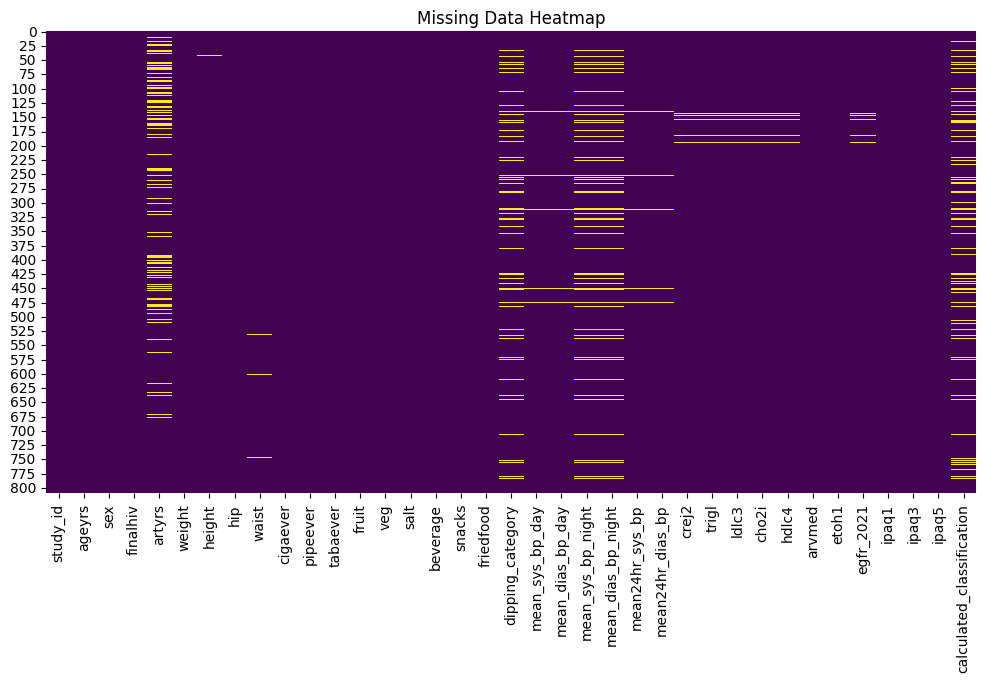

In [14]:
# Visualize missingness
plt.figure(figsize=(12, 6))
sns.heatmap(subset_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

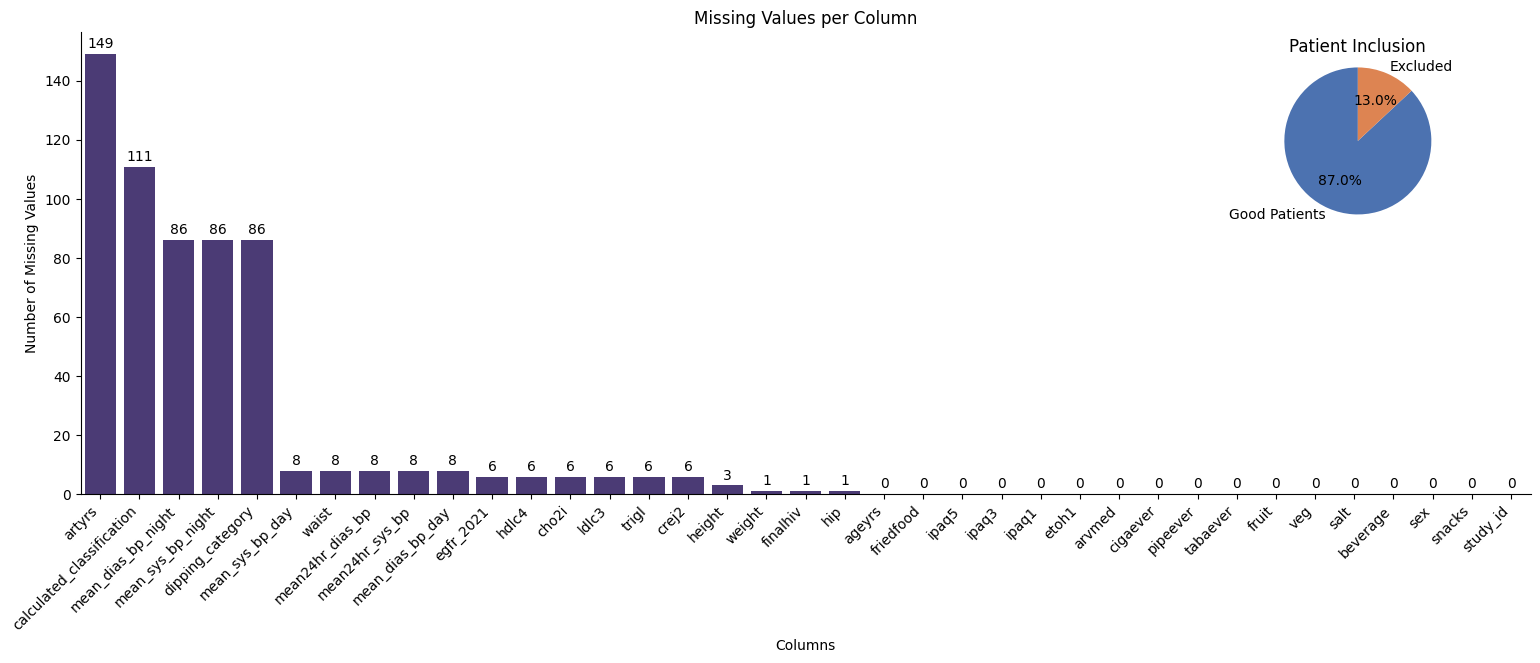

In [15]:
## Bar plot showing missingness
# Calculate the missing counts for each column
missing_counts = subset_data.isnull().sum()

# Filter out columns with no missing values
#missing_counts = missing_counts[missing_counts > 0]

# Sort the missing counts in descending order
missing_counts = missing_counts.sort_values(ascending=False)

# Create a bar plot for visualization
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, color=sns.color_palette("viridis")[0], ax=ax)

# Add values on the bars
for i, v in enumerate(missing_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)


ax.set_xticks(range(len(missing_counts)))
ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')

# Set labels and title
ax.set_xlabel("Columns")
ax.set_ylabel("Number of Missing Values")
ax.set_title("Missing Values per Column")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



inset_ax = inset_axes(ax, width="20%", height="35%", loc='upper right', borderpad=2)
inset_ax.pie(
    [714, 107],
    labels=["Good Patients", "Excluded"],
    colors=["#4C72B0", "#DD8452"],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10}
)
inset_ax.set_title("Patient Inclusion", fontsize=12)
inset_ax.axis('equal')

# Ensure layout is tight to prevent labels overlapping
plt.subplots_adjust(right=0.85)

# Show the plot
plt.show()

## Checking if there any duplicate Patient IDs

In [16]:
# Check for duplicates
duplicates = subset_data[subset_data.duplicated("study_id", keep=False)]

### print the duplicate study ids only
duplicates.head(3)


,study_id,ageyrs,sex,finalhiv,artyrs,weight,height,hip,waist,cigaever,...,ldlc3,cho2i,hdlc4,arvmed,etoh1,egfr_2021,ipaq1,ipaq3,ipaq5,calculated_classification


In [17]:
# Count duplicates
dup_counts = subset_data["study_id"].value_counts()

# Filter those that appear more than once
dup_only = dup_counts[dup_counts > 1]

# Print the number of duplicate IDs and optionally the IDs themselves
print("There are", len(dup_only), "duplicate study IDs.")
print(dup_only)


There are 0 duplicate study IDs.
Series([], Name: count, dtype: int64)


## Checking for inconstient study ids

In [18]:
# Pattern: one letter, digits, a letter (anywhere after digits), then optional digits
# Pattern to match either: A001022 or A008823R21 format
pattern = r"^[A-Za-z]\d+$|^[A-Za-z]\d+[A-Za-z]\d*$"

# Filter rows where study_id does NOT match the pattern
inconsistent_ids = subset_data[~subset_data["study_id"].astype(str).str.match(pattern)]

# Print only the inconsistent study IDs
print("Inconsistent study IDs:")
print(inconsistent_ids["study_id"].unique())



Inconsistent study IDs:
[]


In [19]:
print(inconsistent_ids["study_id"].value_counts())

Series([], Name: count, dtype: int64)


In [20]:
inconsistent_ids.head(10) #Visualise the IDs

,study_id,ageyrs,sex,finalhiv,artyrs,weight,height,hip,waist,cigaever,...,ldlc3,cho2i,hdlc4,arvmed,etoh1,egfr_2021,ipaq1,ipaq3,ipaq5,calculated_classification


## Exclude the study ids with inconsistencies

In [21]:
# Extract inconsistent study IDs
inconsistent_ids_list = inconsistent_ids["study_id"].unique()

# Subset data to exclude inconsistent study IDs
#subset_data = subset_data[~subset_data["study_id"].isin(inconsistent_ids_list)]
#subset_data.head(2)


#### Working on the inconsistencies of the ART column

In [22]:
### Subset for me the artyrs and finalhiv columns
df_art = subset_data[['artyrs', 'finalhiv']]
df_art.head()

,artyrs,finalhiv
0,98.0,N
1,98.0,N
2,13.0,P
3,98.0,P
4,NaN,N


In [23]:
# Check whats the value for artyrs where the finalhiv is N
print(subset_data[subset_data['finalhiv'] == 'N'][['finalhiv', 'artyrs']].head(4))

  finalhiv  artyrs
0        N    98.0
1        N    98.0
4        N     NaN
7        N    98.0


In [24]:
### Replace artyrs with '0' where finalhiv is N
subset_data.loc[subset_data['finalhiv'] == 'N', 'artyrs'] = '0'
print(subset_data[subset_data['finalhiv'] == 'N'][['finalhiv', 'artyrs']].head(3))

  finalhiv artyrs
0        N      0
1        N      0
4        N      0


/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/331448284.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  subset_data.loc[subset_data['finalhiv'] == 'N', 'artyrs'] = '0'


In [25]:
### replace artyrs with '0' where the it is 98 and finalhiv == 'p'
subset_data.loc[(subset_data['finalhiv'] == 'P') & (subset_data['artyrs'] == 98), 'artyrs'] = '0'
print(subset_data[subset_data['finalhiv'] == 'P'][['finalhiv', 'artyrs']].head(3))

  finalhiv artyrs
2        P   13.0
3        P      0
5        P    6.0


##### Check for missingness again after excluding the duplicate/inconstent IDs, working on inconsistencies in art, finalhiv and age columns

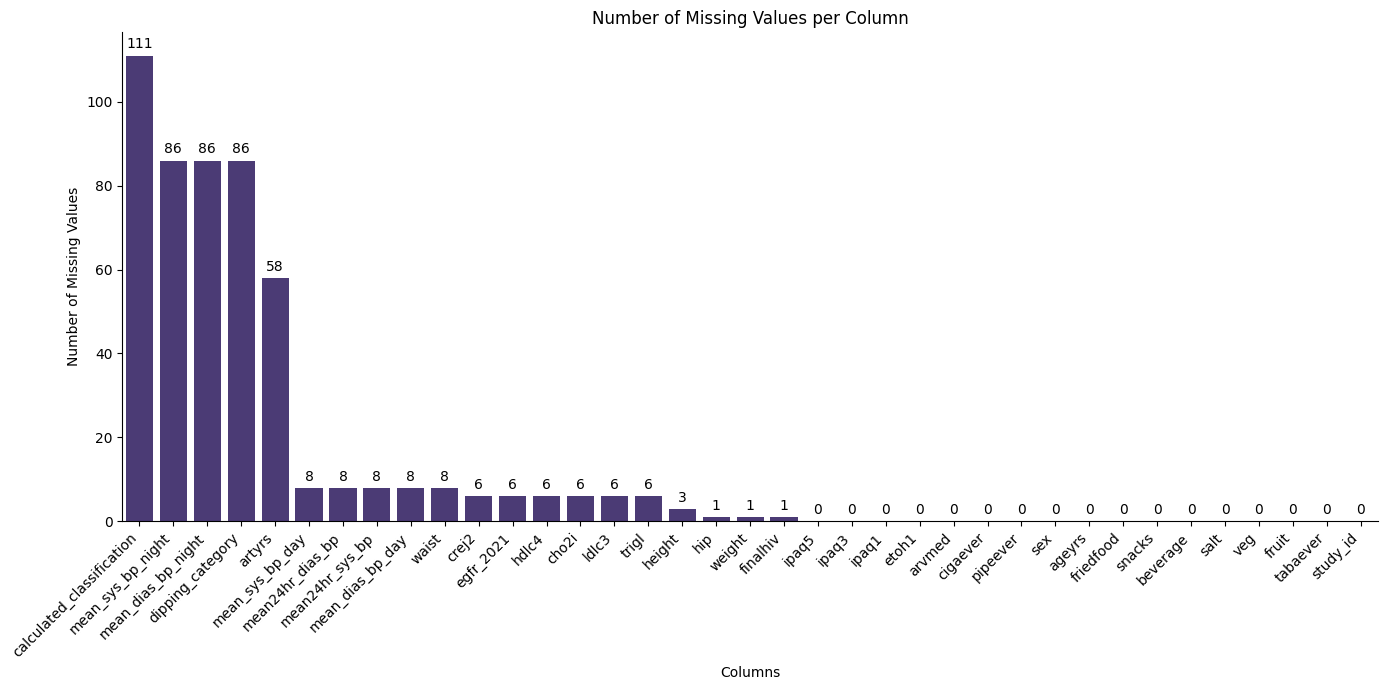

In [26]:
## Bar plot showing missingness
# Calculate the missing counts for each column
missing_counts = subset_data.isnull().sum()

# Sort the missing counts in descending order
missing_counts = missing_counts.sort_values(ascending=False)

# Create a bar plot for visualization
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, color=sns.color_palette("viridis")[0])

# Add values on the bars
for i, v in enumerate(missing_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values per Column")

# Slant the x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ensure layout is tight to prevent labels overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
### Check what study PIDs have both information in the dipping_category and calculated_classification, and those with missing information
# 1. Check which PIDs have both values present
both_present = subset_data[
    subset_data['dipping_category'].notna() & subset_data['calculated_classification'].notna()
]['study_id'].unique()

print("PIDs with both dipping_category and calculated_classification:")
print(both_present.shape)




PIDs with both dipping_category and calculated_classification:
(698,)


In [28]:
# 2. Check which PIDs have dipping_category but missing calculated_classification
missing_calc = subset_data[
    subset_data['dipping_category'].notna() & subset_data['calculated_classification'].isna()
]['study_id'].unique()

print("\nPIDs with dipping_category but missing calculated_classification:")
print(missing_calc.shape)


PIDs with dipping_category but missing calculated_classification:
(26,)


In [29]:
missing_calc = subset_data[
    subset_data['dipping_category'].notna() & subset_data['calculated_classification'].isna()]

In [30]:
missing_calc.head(3)

,study_id,ageyrs,sex,finalhiv,artyrs,weight,height,hip,waist,cigaever,...,ldlc3,cho2i,hdlc4,arvmed,etoh1,egfr_2021,ipaq1,ipaq3,ipaq5,calculated_classification
17,F040414,45,M,N,0,56.0,171.199997,90.0,69.0,2,...,3.94,5.82,1.07,8,3,94.587558,3,3,2,NaN
100,D055737,45,M,N,0,58.5,161.000000,88.5,76.0,1,...,1.60,3.18,1.17,8,4,111.222093,4,3,1,NaN
122,B040127,40,M,N,0,56.0,161.500000,90.0,72.0,2,...,1.83,3.60,1.19,8,4,114.735048,6,7,7,NaN


In [31]:
missing_calc.to_csv('/Users/kassywang/Documents/Summer Project/R/with outliers/missing_calculated_classification.csv', index=False)

In [32]:
## check the column names
missing_calc.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'cigaever', 'pipeever', 'tabaever', 'fruit', 'veg',
       'salt', 'beverage', 'snacks', 'friedfood', 'dipping_category',
       'mean_sys_bp_day', 'mean_dias_bp_day', 'mean_sys_bp_night',
       'mean_dias_bp_night', 'mean24hr_sys_bp', 'mean24hr_dias_bp', 'crej2',
       'trigl', 'ldlc3', 'cho2i', 'hdlc4', 'arvmed', 'etoh1', 'egfr_2021',
       'ipaq1', 'ipaq3', 'ipaq5', 'calculated_classification'],
      dtype='object')

## Exclude all rows with missingness for dipping catergory

In [33]:
## Check what samples dont have dipping_catergory information
missing_dipping = subset_data[subset_data['dipping_category'].isna()]
missing_dipping.shape

(86, 37)

In [34]:
missing_dipping.to_csv('/Users/kassywang/Documents/Summer Project/R/with outliers/missing_dipping_category.csv', index=False)

###### Creating a new dataset

In [35]:
clean_data= subset_data.dropna(subset=['dipping_category'])

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 809
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   study_id                   724 non-null    object 
 1   ageyrs                     724 non-null    int64  
 2   sex                        724 non-null    object 
 3   finalhiv                   723 non-null    object 
 4   artyrs                     670 non-null    object 
 5   weight                     723 non-null    float64
 6   height                     721 non-null    float64
 7   hip                        723 non-null    float64
 8   waist                      716 non-null    float64
 9   cigaever                   724 non-null    int64  
 10  pipeever                   724 non-null    int64  
 11  tabaever                   724 non-null    int64  
 12  fruit                      724 non-null    int64  
 13  veg                        724 non-null    int64  
 14 

In [36]:
## list unique catergories for cigaever
clean_data['tabaever'].value_counts()

tabaever
2    700
1     24
Name: count, dtype: int64

In [37]:
### Create a binary column called Smoking from columns tabaever, pipeever, cigarever which consist of data as 1 meaning Yes and 2 meaning No
# Create the `smoking` column based on the conditions
clean_data['smoking'] = clean_data[['cigaever', 'pipeever', 'tabaever']].apply(
    lambda row: 1 if (row == 1).any() else 0, axis=1
)
clean_data['smoking'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2224870147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['smoking'] = clean_data[['cigaever', 'pipeever', 'tabaever']].apply(


smoking
0    662
1     62
Name: count, dtype: int64

In [38]:
# Subset the specified columns
subset = clean_data[['cigaever', 'pipeever', 'tabaever', 'smoking']]

# Display the first few rows
print(subset.head())


   cigaever  pipeever  tabaever  smoking
0         2         2         2        0
1         2         2         2        0
2         2         2         2        0
3         2         2         2        0
4         2         2         2        0


In [39]:
## delete the cigaever, pipever and tabever columns
clean_data.drop(columns=['cigaever', 'pipeever', 'tabaever'], inplace=True)

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2487463625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['cigaever', 'pipeever', 'tabaever'], inplace=True)


In [40]:
clean_data.head(2)

,study_id,ageyrs,sex,finalhiv,artyrs,weight,height,hip,waist,fruit,...,cho2i,hdlc4,arvmed,etoh1,egfr_2021,ipaq1,ipaq3,ipaq5,calculated_classification,smoking
0,H052613,47,F,N,0,92.0,162.0,131.0,107.0,1,...,7.10,1.53,8,2,111.341142,0,7,1,Dipper,0
1,D061196,40,F,N,0,50.0,151.0,90.0,85.0,5,...,3.35,1.04,8,1,112.054307,4,2,4,Non-dipper,0


## Mapping the various columns

In [41]:
# Sex: M → 1, F → 0
clean_data.loc[:, 'sex'] = clean_data['sex'].replace({'F': '0', 'M': '1'})

# HIV status: N → 0, P → 1
clean_data.loc[:, 'finalhiv'] = clean_data['finalhiv'].replace({'N': '0', 'P': '1'})

# Dipping category:
# dippers → 1, non dippers → 0, reverse dippers → 3, Extreme dippers → 2
clean_data.loc[:, 'dipping_category'] = clean_data['dipping_category'].replace({
    'dippers': '0',
    'non dippers': '1',
    'reverse dippers': '3',
    'Extreme dippers': '2'
})

clean_data.loc[:, 'calculated_classification'] = clean_data['calculated_classification'].replace({
    'Dipper': '0',
    'Non-dipper': '1',
    'Reverse Dipper': '3',
    'Extreme Dipper': '2'
})

In [42]:
## Check distribution of the calculated_classification
clean_data['dipping_category'].value_counts()

dipping_category
0    310
1    309
3     57
2     48
Name: count, dtype: int64

#### Converting the columns to correct data types

In [43]:
clean_data.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'fruit', 'veg', 'salt', 'beverage', 'snacks',
       'friedfood', 'dipping_category', 'mean_sys_bp_day', 'mean_dias_bp_day',
       'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp',
       'mean24hr_dias_bp', 'crej2', 'trigl', 'ldlc3', 'cho2i', 'hdlc4',
       'arvmed', 'etoh1', 'egfr_2021', 'ipaq1', 'ipaq3', 'ipaq5',
       'calculated_classification', 'smoking'],
      dtype='object')

In [44]:
### rename column egfr_2021 to eGFR_2021
clean_data.rename(columns={'egfr_2021': 'eGFR_2021'}, inplace=True)

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/3317668068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.rename(columns={'egfr_2021': 'eGFR_2021'}, inplace=True)


In [45]:
## Converting the ageyrs to interger from float
clean_data['ageyrs'] = clean_data['ageyrs'].astype(int)

# Columns to exclude from categorical conversion
exclude_columns = [
    "ageyrs",  "weight", "height", 'hip', 'waist', 'hivyrs','crej2',
       'trigl', 'ldlc3', 'cho2i', 'hdlc4','mean_sys_bp_night',
    'mean_dias_bp_night', 'mean_sys_bp_day','mean_dias_bp_day',
    'mean24hr_sys_bp', 'mean24hr_dias_bp','eGFR_2021'
]
# Select all columns except the ones in exclude_columns
columns_to_convert = clean_data.columns.difference(exclude_columns)

# Convert selected columns to categorical
clean_data[columns_to_convert] = clean_data[columns_to_convert].astype('category')

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/3463277987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['ageyrs'] = clean_data['ageyrs'].astype(int)
/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/3463277987.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[columns_to_convert] = clean_data[columns_to_convert].astype('category')


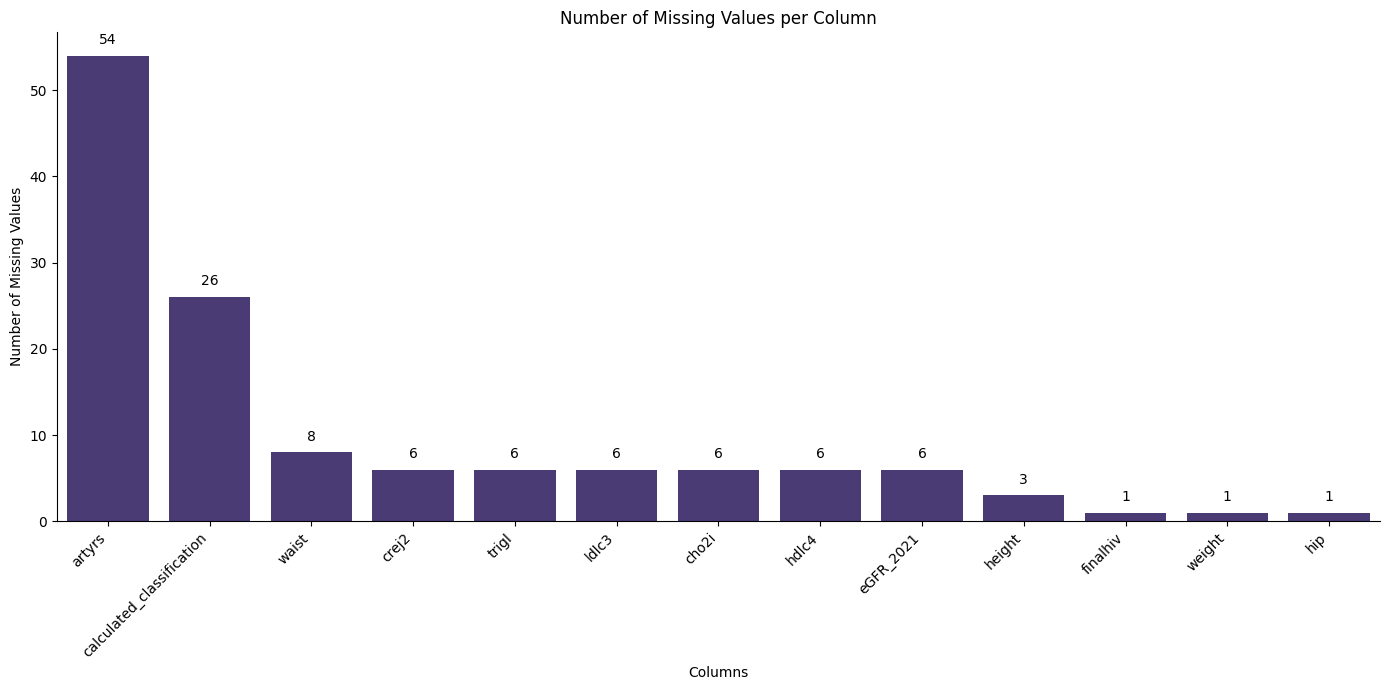

In [46]:
## Bar plot showing missingness
# Calculate the missing counts for each column
missing_counts = clean_data.isnull().sum()

# Filter out columns with no missing values
missing_counts = missing_counts[missing_counts > 0]

# Sort the missing counts in descending order
missing_counts = missing_counts.sort_values(ascending=False)

# Create a bar plot for visualization
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, color=sns.color_palette("viridis")[0])

# Add values on the bars
for i, v in enumerate(missing_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values per Column")

# Slant the x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ensure layout is tight to prevent labels overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
### CheCk whether the pids missing art information are hiv =P
missing_art_p = clean_data[
    (clean_data['finalhiv'] == "1") &
    (clean_data[['artyrs']].isnull().all(axis=1))
]

print(
    missing_art_p[['study_id', 'finalhiv', 'artyrs']].head(5)
)



   study_id finalhiv artyrs
11  J065777        1    NaN
22  A021816        1    NaN
32  K112101        1    NaN
35  D124302        1    NaN
41  B010063        1    NaN


In [48]:
pids_missing_art = missing_art_p['study_id'].unique()
print(pids_missing_art)

['J065777', 'A021816', 'K112101', 'D124302', 'B010063', ..., 'E004754', 'G008219', 'A007234', 'G027553', 'A065779']
Length: 54
Categories (724, object): ['A007234', 'A007666', 'A008629', 'A008823R21', ..., 'K138296R21', 'K139445R21', 'K143032', 'K281938R21']


In [49]:
missing_art_p.to_csv("/Users/kassywang/Documents/Summer Project/R/with outliers/pids_missing_art_info_and_hiv_positive.csv", index=False)

## Imputing for the missing variables to obtain a complete dataset

In [50]:
## list the column names
clean_data.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'fruit', 'veg', 'salt', 'beverage', 'snacks',
       'friedfood', 'dipping_category', 'mean_sys_bp_day', 'mean_dias_bp_day',
       'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp',
       'mean24hr_dias_bp', 'crej2', 'trigl', 'ldlc3', 'cho2i', 'hdlc4',
       'arvmed', 'etoh1', 'eGFR_2021', 'ipaq1', 'ipaq3', 'ipaq5',
       'calculated_classification', 'smoking'],
      dtype='object')

In [51]:
from sklearn.impute import SimpleImputer

# Specify the columns to impute
columns_to_impute = ["weight", "height", 'hip', 'waist', 'artyrs','eGFR_2021', 'crej2',
       'trigl', 'ldlc3', 'cho2i', 'hdlc4'  ]

# Create a SimpleImputer instance with strategy set to 'median'
imputer = SimpleImputer(strategy='median')

# Apply the imputer only to the specified columns
clean_data[columns_to_impute] = imputer.fit_transform(clean_data[columns_to_impute])

# Round the imputed values to one decimal place
clean_data[columns_to_impute] = clean_data[columns_to_impute].round(1)


/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1988876262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[columns_to_impute] = imputer.fit_transform(clean_data[columns_to_impute])
/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1988876262.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[columns_to_impute] = clean_data[columns_to_impute].round(1)


In [52]:
# Specify the columns to impute
columns_to_impute = ["finalhiv"]
# Create a SimpleImputer instance with strategy set to 'most_frequeny' for the catergorical variables
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer only to the specified columns
clean_data[columns_to_impute] = imputer.fit_transform(clean_data[columns_to_impute])


/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2235108533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[columns_to_impute] = imputer.fit_transform(clean_data[columns_to_impute])


## Creating a new column called bmi from weight and height

In [53]:
# Convert height from cm to meters and calculate BMI
clean_data['bmi'] = (clean_data['weight'] / (clean_data['height'] / 100) ** 2).round(1)

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/792905278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['bmi'] = (clean_data['weight'] / (clean_data['height'] / 100) ** 2).round(1)


In [54]:
clean_data.head(2)

,study_id,ageyrs,sex,finalhiv,artyrs,weight,height,hip,waist,fruit,...,hdlc4,arvmed,etoh1,eGFR_2021,ipaq1,ipaq3,ipaq5,calculated_classification,smoking,bmi
0,H052613,47,0,0,0.0,92.0,162.0,131.0,107.0,1,...,1.5,8,2,111.3,0,7,1,0,0,35.1
1,D061196,40,0,0,0.0,50.0,151.0,90.0,85.0,5,...,1.0,8,1,112.1,4,2,4,1,0,21.9


#### Creating a new column for the waist:hip ration

In [55]:
# Create a new column 'waist_hip_ratio'
clean_data['waist_hip_ratio'] = clean_data['waist'] / clean_data['hip']

# Round to 2 decimal places
clean_data['waist_hip_ratio'] = clean_data['waist_hip_ratio'].round(2)

# View the first few rows to confirm
print(clean_data[['waist', 'hip', 'waist_hip_ratio']].head())


   waist    hip  waist_hip_ratio
0  107.0  131.0             0.82
1   85.0   90.0             0.94
2   78.0   86.0             0.91
3   95.0  103.0             0.92
4   74.0   75.0             0.99


/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1408424788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['waist_hip_ratio'] = clean_data['waist'] / clean_data['hip']
/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1408424788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['waist_hip_ratio'] = clean_data['waist_hip_ratio'].round(2)


#### Creating the binary columns for columns arvmed, tbtx and etoh3

In [56]:
clean_data['arvmed'].value_counts()

arvmed
8    531
1    193
Name: count, dtype: int64

In [57]:
### Replacing the 8 with 0 to create a binary column
clean_data['arvmed'] = clean_data['arvmed'].replace({8: 0})
clean_data['arvmed'].value_counts()


/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2635734787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['arvmed'] = clean_data['arvmed'].replace({8: 0})


arvmed
0    531
1    193
Name: count, dtype: int64

In [58]:
## Checking the distribution of how often someone takes alcohol
clean_data['etoh1'].value_counts()

etoh1
1    384
2    140
3     77
4     73
5     50
Name: count, dtype: int64

In [59]:
### Creating a new binary column for alcohol consumption
clean_data['alcohol_consumption'] = clean_data['etoh1'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') > 1 else 0
)

clean_data['alcohol_consumption'].value_counts()


/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/3068972961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['alcohol_consumption'] = clean_data['etoh1'].apply(


alcohol_consumption
0    384
1    340
Name: count, dtype: int64

In [60]:
### delete the etoh1 column
clean_data.drop(columns=['etoh1'], inplace=True)

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2480974232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['etoh1'], inplace=True)


In [61]:
### Create value counts for 'fruit', 'veg', 'salt', 'beverage', 'snacks', 'friedfood'
for column in ['fruit', 'veg', 'salt', 'beverage', 'snacks', 'friedfood']:
    print(f"Value counts for {column}:")
    print(clean_data[column].unique())
    print("\n")

Value counts for fruit:
[1, 5, 7, 2, 4, 6, 3, 0]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


Value counts for veg:
[1, 7, 2, 4, 3, 0, 5, 6]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


Value counts for salt:
[5, 4, 3, 1, 2]
Categories (5, int64): [1, 2, 3, 4, 5]


Value counts for beverage:
[1, 0, 2, 5, 7, 3, 4, 6]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


Value counts for snacks:
[7, 1, 0, 5, 4, 3, 2, 6]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


Value counts for friedfood:
[3, 1, 7, 5, 2, 0, 6, 4]
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]




In [62]:
### value count for salt
clean_data['salt'].value_counts()

salt
5    259
4    228
3    152
2     53
1     32
Name: count, dtype: int64

In [63]:
### Create a binary column for salt converting all the other catergories : 1,2,3,4 to 1 and 5 to 0
clean_data['salt'] = clean_data['salt'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') < 5 else 0
)

clean_data['salt'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2457774901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['salt'] = clean_data['salt'].apply(


salt
1    465
0    259
Name: count, dtype: int64

In [64]:
clean_data['veg'].value_counts()

veg
2    168
7    153
3    139
1    109
4     69
5     41
0     27
6     18
Name: count, dtype: int64

In [65]:
### Creating a new binary column for veg
clean_data['veg'] = clean_data['veg'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['veg'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1938512222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['veg'] = clean_data['veg'].apply(


veg
1    697
0     27
Name: count, dtype: int64

In [66]:
### Creating a new binary column for beverage
clean_data['beverage'] = clean_data['beverage'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['beverage'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1675340977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['beverage'] = clean_data['beverage'].apply(


beverage
1    660
0     64
Name: count, dtype: int64

In [67]:
### Creating a new binary column for fruit
clean_data['fruit'] = clean_data['fruit'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['fruit'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1647838766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fruit'] = clean_data['fruit'].apply(


fruit
1    712
0     12
Name: count, dtype: int64

In [68]:
### Creating a new binary column for fried food
clean_data['friedfood'] = clean_data['friedfood'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['friedfood'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1377139023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['friedfood'] = clean_data['friedfood'].apply(


friedfood
1    677
0     47
Name: count, dtype: int64

In [69]:
### Creating a new binary column for snacks
clean_data['snacks'] = clean_data['snacks'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['snacks'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2405191044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['snacks'] = clean_data['snacks'].apply(


snacks
1    643
0     81
Name: count, dtype: int64

In [70]:
clean_data.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'fruit', 'veg', 'salt', 'beverage', 'snacks',
       'friedfood', 'dipping_category', 'mean_sys_bp_day', 'mean_dias_bp_day',
       'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp',
       'mean24hr_dias_bp', 'crej2', 'trigl', 'ldlc3', 'cho2i', 'hdlc4',
       'arvmed', 'eGFR_2021', 'ipaq1', 'ipaq3', 'ipaq5',
       'calculated_classification', 'smoking', 'bmi', 'waist_hip_ratio',
       'alcohol_consumption'],
      dtype='object')

In [71]:
clean_data['ipaq1'].value_counts()

ipaq1
0    220
3     90
6     89
2     72
7     71
5     70
4     65
1     47
Name: count, dtype: int64

In [72]:
### Creating a new binary column for snacks
clean_data['ipaq1'] = clean_data['ipaq1'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['ipaq1'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/3960176060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['ipaq1'] = clean_data['ipaq1'].apply(


ipaq1
1    504
0    220
Name: count, dtype: int64

In [73]:
clean_data['ipaq5'].value_counts()

ipaq5
7    172
0    126
2    102
1     96
5     69
3     64
4     54
6     41
Name: count, dtype: int64

In [74]:
### Creating a new binary column for snacks
clean_data['ipaq5'] = clean_data['ipaq5'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['ipaq5'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/882944015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['ipaq5'] = clean_data['ipaq5'].apply(


ipaq5
1    598
0    126
Name: count, dtype: int64

In [75]:
clean_data['ipaq3'].value_counts()

ipaq3
7    243
3    104
2     87
4     66
5     66
0     58
6     57
1     43
Name: count, dtype: int64

In [76]:
### Creating a new binary column for snacks
clean_data['ipaq3'] = clean_data['ipaq3'].apply(
    lambda x: 1 if pd.to_numeric(x, errors='coerce') >= 1 else 0
)
clean_data['ipaq3'].value_counts()

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2284479918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['ipaq3'] = clean_data['ipaq3'].apply(


ipaq3
1    666
0     58
Name: count, dtype: int64

## Investigating the correlations between the numerical variables

In [77]:
### Creating a new column called calculated dipping category
clean_data['calculated_dipping_status'] = (
    (clean_data['mean_sys_bp_day'] - clean_data['mean_sys_bp_night']) / clean_data['mean_sys_bp_day']
)

# Round to 2 decimal places
clean_data['calculated_dipping_status'] = clean_data['calculated_dipping_status'].round(2)

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1392145933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['calculated_dipping_status'] = (
/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1392145933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['calculated_dipping_status'] = clean_data['calculated_dipping_status'].round(2)


In [78]:
### rename the 'ipaq1', to vigorous physical activity, 'ipaq3' to moderate physical activity and 'ipaq5' to Walking
clean_data.rename(columns={'ipaq1': 'vigorous physical activity',
                           'ipaq3': 'moderate physical activity',
                           'ipaq5': 'walking',
                           'crej2':'creatinine',
                           'cho2i': 'total cholesterol',
                           'trigl': 'triglycerides',
                           'ldlc3': 'low-density lipoprotein',
                           'hdlc4': 'high-density lipoprotein',
                           }, inplace=True)
clean_data.columns

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2359565724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.rename(columns={'ipaq1': 'vigorous physical activity',


Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'fruit', 'veg', 'salt', 'beverage', 'snacks',
       'friedfood', 'dipping_category', 'mean_sys_bp_day', 'mean_dias_bp_day',
       'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp',
       'mean24hr_dias_bp', 'creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'arvmed', 'eGFR_2021',
       'vigorous physical activity', 'moderate physical activity', 'walking',
       'calculated_classification', 'smoking', 'bmi', 'waist_hip_ratio',
       'alcohol_consumption', 'calculated_dipping_status'],
      dtype='object')

In [79]:
clean_data.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'fruit', 'veg', 'salt', 'beverage', 'snacks',
       'friedfood', 'dipping_category', 'mean_sys_bp_day', 'mean_dias_bp_day',
       'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp',
       'mean24hr_dias_bp', 'creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'arvmed', 'eGFR_2021',
       'vigorous physical activity', 'moderate physical activity', 'walking',
       'calculated_classification', 'smoking', 'bmi', 'waist_hip_ratio',
       'alcohol_consumption', 'calculated_dipping_status'],
      dtype='object')

In [80]:
correlation_matrix = clean_data[["ageyrs", "weight", "height", "bmi",
                                 "waist", "hip",'waist_hip_ratio','creatinine',
                                  'triglycerides', 'low-density lipoprotein', 'total cholesterol', 'high-density lipoprotein','artyrs', 'mean24hr_sys_bp', 'mean24hr_dias_bp',
                                 'mean_sys_bp_night','mean_dias_bp_night','mean_sys_bp_day',
                                 'mean_dias_bp_day','eGFR_2021','calculated_dipping_status'
                                 ]].corr()
correlation_matrix.head(5)

,ageyrs,weight,height,bmi,waist,hip,waist_hip_ratio,creatinine,triglycerides,low-density lipoprotein,...,high-density lipoprotein,artyrs,mean24hr_sys_bp,mean24hr_dias_bp,mean_sys_bp_night,mean_dias_bp_night,mean_sys_bp_day,mean_dias_bp_day,eGFR_2021,calculated_dipping_status
ageyrs,1.000000,0.027359,0.039438,-0.007715,-0.009409,0.214631,-0.039168,0.037513,0.177721,0.027609,...,-0.042794,0.118923,0.219482,0.285977,0.226224,0.285032,0.202563,0.262331,-0.506292,-0.053061
weight,0.027359,1.000000,0.689379,0.683158,0.025145,0.174648,0.000227,-0.044871,0.063243,0.023592,...,-0.055884,-0.020740,0.010687,-0.024417,0.008370,-0.016972,0.008706,-0.026910,0.023095,-0.000121
height,0.039438,0.689379,1.000000,-0.054056,-0.004575,0.041273,-0.010650,0.002805,0.030283,-0.024120,...,-0.001278,-0.027887,-0.002919,-0.035402,-0.004488,-0.029429,-0.003798,-0.035455,0.034144,0.000473
bmi,-0.007715,0.683158,-0.054056,1.000000,0.039162,0.212507,0.008964,-0.045286,0.065602,0.049548,...,-0.078535,-0.006516,0.029882,0.010563,0.028386,0.015839,0.027006,0.006239,0.003059,-0.004280
waist,-0.009409,0.025145,-0.004575,0.039162,1.000000,0.132971,0.988909,-0.113386,0.110492,0.055090,...,0.002353,0.380773,-0.003721,-0.008322,-0.017343,-0.023290,0.000275,-0.004473,0.064355,0.028519


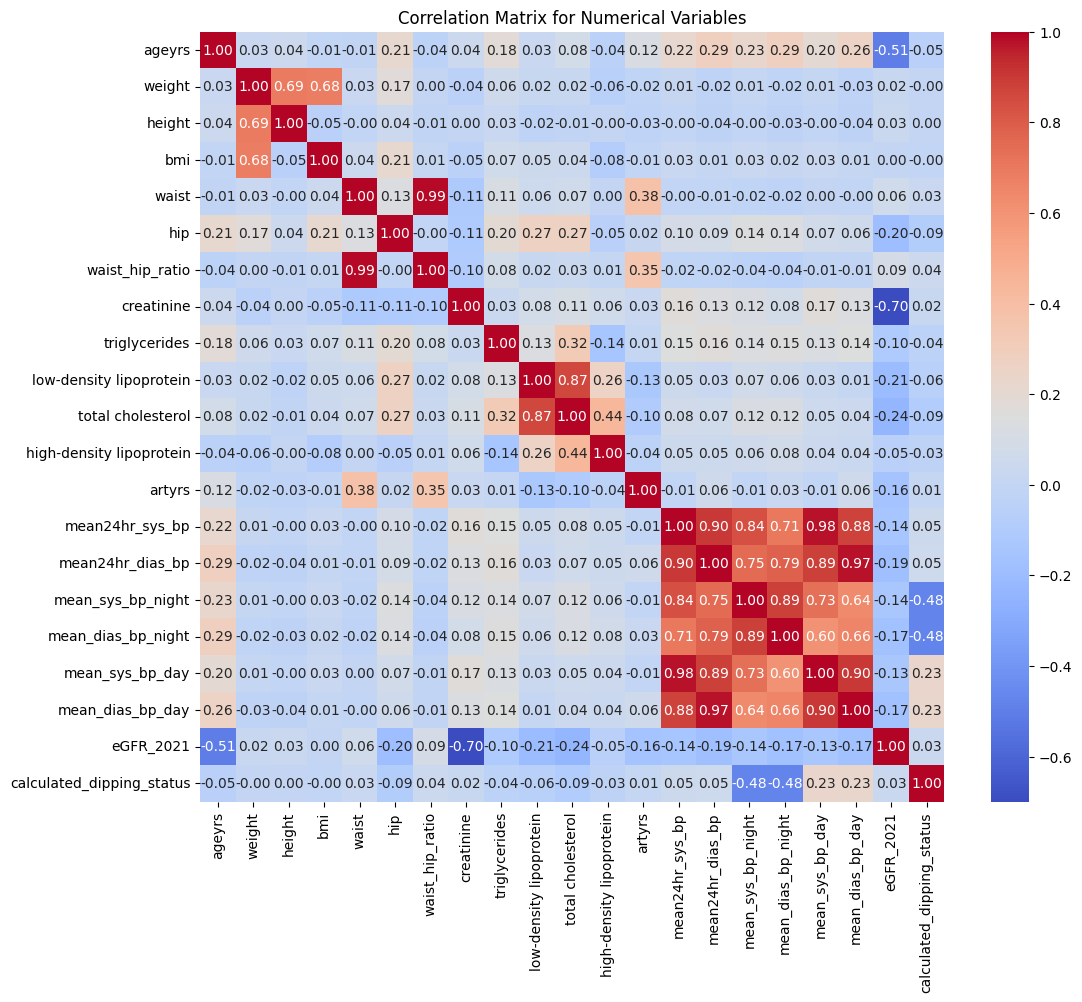

In [81]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
#plt.savefig("../results/num_correlation_matrix.png", bbox_inches='tight')
plt.show()

##### Using Cramer's V to assess the association between the catergorical variables

In [82]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 809
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   study_id                    724 non-null    category
 1   ageyrs                      724 non-null    int64   
 2   sex                         724 non-null    category
 3   finalhiv                    724 non-null    object  
 4   artyrs                      724 non-null    float64 
 5   weight                      724 non-null    float64 
 6   height                      724 non-null    float64 
 7   hip                         724 non-null    float64 
 8   waist                       724 non-null    float64 
 9   fruit                       724 non-null    int64   
 10  veg                         724 non-null    int64   
 11  salt                        724 non-null    int64   
 12  beverage                    724 non-null    int64   
 13  snacks                   

In [83]:
clean_data['alcohol_consumption'] = clean_data['alcohol_consumption'] .astype('category')

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1443379774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['alcohol_consumption'] = clean_data['alcohol_consumption'] .astype('category')


In [84]:
### Convert fruit, veg, salt, snacks, fried_food and beverage to catergorical
categorical_columns = ['fruit', 'veg', 'salt', 'snacks', 'friedfood', 'beverage','vigorous physical activity', 'moderate physical activity', 'walking']
for col in categorical_columns:
    clean_data[col] = clean_data[col].astype('category')

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/1964917228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[col] = clean_data[col].astype('category')


In [85]:
clean_data.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'fruit', 'veg', 'salt', 'beverage', 'snacks',
       'friedfood', 'dipping_category', 'mean_sys_bp_day', 'mean_dias_bp_day',
       'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp',
       'mean24hr_dias_bp', 'creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'arvmed', 'eGFR_2021',
       'vigorous physical activity', 'moderate physical activity', 'walking',
       'calculated_classification', 'smoking', 'bmi', 'waist_hip_ratio',
       'alcohol_consumption', 'calculated_dipping_status'],
      dtype='object')

In [86]:
from scipy import stats

# Get categorical columns
categorical_columns = ['sex', 'finalhiv','dipping_category','smoking','friedfood', 'fruit','arvmed',
                       'veg', 'salt', 'snacks', 'beverage','alcohol_consumption','vigorous physical activity', 'moderate physical activity', 'walking']

# Function to compute Cramér's V
def cramers_v(x, y):
    """Calculate Cramér's V for categorical variables"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min(r_corr - 1, k_corr - 1))

# Create an empty dataframe to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Compute Cramér's V for all pairs of categorical variables
for var1 in categorical_columns:
    for var2 in categorical_columns:
        if var1 != var2:
            cramers_v_matrix.loc[var1, var2] = cramers_v(clean_data[var1], clean_data[var2])
        else:
            cramers_v_matrix.loc[var1, var2] = 1.0  # Diagonal values are 1 (perfect correlation)

# Convert to numeric values
cramers_v_matrix = cramers_v_matrix.astype(float)

# Display the matrix
cramers_v_matrix.head()

,sex,finalhiv,dipping_category,smoking,friedfood,fruit,arvmed,veg,salt,snacks,beverage,alcohol_consumption,vigorous physical activity,moderate physical activity,walking
sex,1.000000,0.152037,0.076181,0.231409,0.056092,0.0,0.136708,0.015984,0.019028,0.000000,0.083897,0.078624,0.148266,0.0,0.000000
finalhiv,0.152037,1.000000,0.000000,0.000000,0.211957,0.0,0.959008,0.000000,0.000000,0.117824,0.106999,0.029349,0.000000,0.0,0.000000
dipping_category,0.076181,0.000000,1.000000,0.058512,0.000000,0.0,0.000000,0.000000,0.065368,0.037635,0.000000,0.000000,0.104696,0.0,0.000000
smoking,0.231409,0.000000,0.058512,1.000000,0.058897,0.0,0.000000,0.000000,0.000000,0.041630,0.000000,0.085092,0.000000,0.0,0.048787
friedfood,0.056092,0.211957,0.000000,0.058897,1.000000,0.0,0.212076,0.000000,0.000000,0.268692,0.180895,0.000000,0.000000,0.0,0.000000


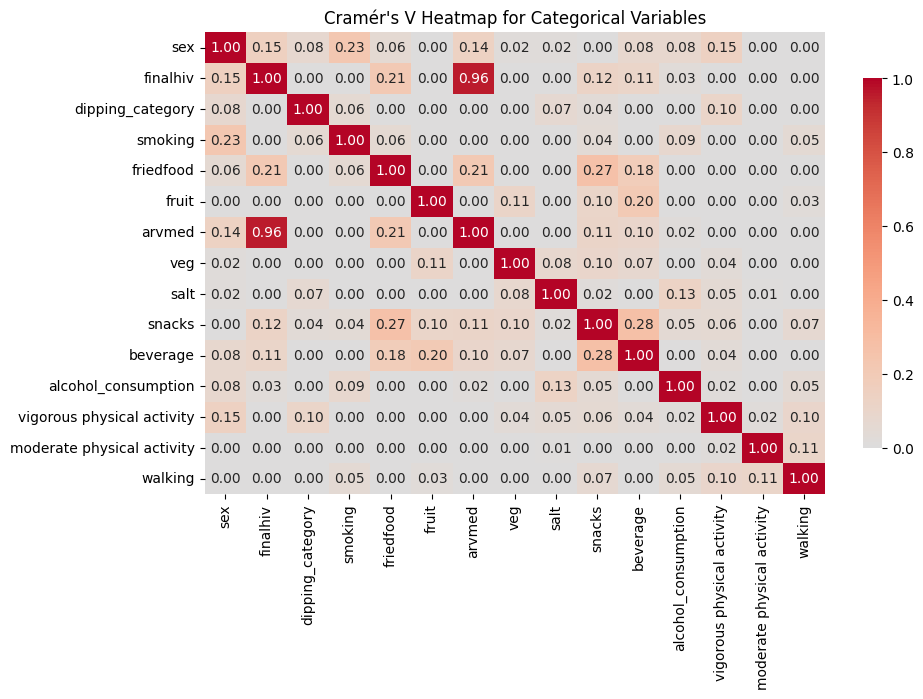

In [87]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, cbar_kws={"shrink": 0.8})
plt.title("Cramér's V Heatmap for Categorical Variables")
#plt.savefig("../results/categorical_correlation_matrix.png", bbox_inches='tight')
plt.show()

## Excluding one of the variables that are highly correlated

In [88]:
clean_data.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'weight', 'height',
       'hip', 'waist', 'fruit', 'veg', 'salt', 'beverage', 'snacks',
       'friedfood', 'dipping_category', 'mean_sys_bp_day', 'mean_dias_bp_day',
       'mean_sys_bp_night', 'mean_dias_bp_night', 'mean24hr_sys_bp',
       'mean24hr_dias_bp', 'creatinine', 'triglycerides',
       'low-density lipoprotein', 'total cholesterol',
       'high-density lipoprotein', 'arvmed', 'eGFR_2021',
       'vigorous physical activity', 'moderate physical activity', 'walking',
       'calculated_classification', 'smoking', 'bmi', 'waist_hip_ratio',
       'alcohol_consumption', 'calculated_dipping_status'],
      dtype='object')

In [100]:
# Exclude 'height_cm' and 'bmi' columns
clean_data2 = clean_data.drop(columns=['height', 'weight','arvmed',
                                      'waist', 'hip',
                                      'mean24hr_sys_bp', 'mean24hr_dias_bp',
                                      'mean_sys_bp_night','mean_dias_bp_night','mean_sys_bp_day',
                                      'mean_dias_bp_day'
                                      ])
clean_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 809
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   study_id                    724 non-null    category
 1   ageyrs                      724 non-null    int64   
 2   sex                         724 non-null    category
 3   finalhiv                    724 non-null    object  
 4   artyrs                      724 non-null    float64 
 5   fruit                       724 non-null    category
 6   veg                         724 non-null    category
 7   salt                        724 non-null    category
 8   beverage                    724 non-null    category
 9   snacks                      724 non-null    category
 10  friedfood                   724 non-null    category
 11  dipping_category            724 non-null    category
 12  creatinine                  724 non-null    float64 
 13  triglycerides            

In [101]:
### Round of the columns 'crej2', 'trigl', 'ldlc3','cho2i', 'hdlc4', to 2 decimal places
columns_to_round = ['creatinine', 'triglycerides', 'low-density lipoprotein','total cholesterol', 'high-density lipoprotein']
clean_data2[columns_to_round] = clean_data2[columns_to_round].round(2)

In [102]:
clean_data2.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'fruit', 'veg',
       'salt', 'beverage', 'snacks', 'friedfood', 'dipping_category',
       'creatinine', 'triglycerides', 'low-density lipoprotein',
       'total cholesterol', 'high-density lipoprotein', 'eGFR_2021',
       'vigorous physical activity', 'moderate physical activity', 'walking',
       'calculated_classification', 'smoking', 'bmi', 'waist_hip_ratio',
       'alcohol_consumption', 'calculated_dipping_status'],
      dtype='object')

In [103]:
clean_data2.head(2)

,study_id,ageyrs,sex,finalhiv,artyrs,fruit,veg,salt,beverage,snacks,...,eGFR_2021,vigorous physical activity,moderate physical activity,walking,calculated_classification,smoking,bmi,waist_hip_ratio,alcohol_consumption,calculated_dipping_status
0,H052613,47,0,0,0.0,1,1,0,1,1,...,111.3,0,1,1,0,0,35.1,0.82,1,0.12
1,D061196,40,0,0,0.0,1,1,1,1,1,...,112.1,1,1,1,1,0,21.9,0.94,0,0.13


#### Visualizing the distribution of the variables

In [104]:
clean_data2.columns

Index(['study_id', 'ageyrs', 'sex', 'finalhiv', 'artyrs', 'fruit', 'veg',
       'salt', 'beverage', 'snacks', 'friedfood', 'dipping_category',
       'creatinine', 'triglycerides', 'low-density lipoprotein',
       'total cholesterol', 'high-density lipoprotein', 'eGFR_2021',
       'vigorous physical activity', 'moderate physical activity', 'walking',
       'calculated_classification', 'smoking', 'bmi', 'waist_hip_ratio',
       'alcohol_consumption', 'calculated_dipping_status'],
      dtype='object')

/var/folders/wq/b2qbgnmj6kz44m3p5q78d8jr0000gn/T/ipykernel_49798/2268093504.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clean_data2, x='calculated_dipping_status', palette='viridis')


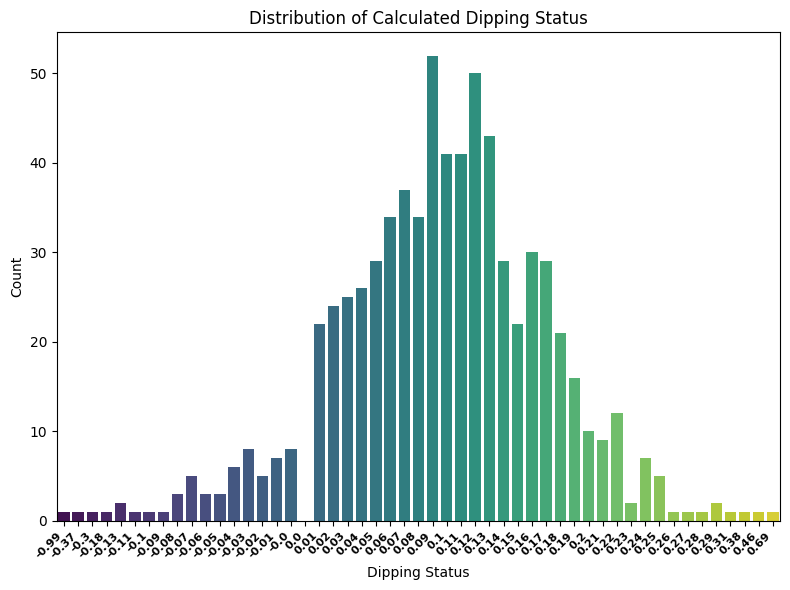

In [105]:
# Sample: Load your data (replace with your actual DataFrame)
# df = pd.read_csv("your_data.csv")

# Assuming your DataFrame is named df and contains the column 'calculated_dipping_status'
plt.figure(figsize=(8, 6))  # Adjust figure size to avoid congestion
sns.countplot(data=clean_data2, x='calculated_dipping_status', palette='viridis')

# Improve x-axis labels
plt.xticks(rotation=45, ha='right',fontsize=8, fontweight='bold')  # Rotate if labels are long
plt.xlabel('Dipping Status')
plt.ylabel('Count')
plt.title('Distribution of Calculated Dipping Status')
plt.tight_layout()
plt.show()

In [106]:
clean_data2.shape

(724, 27)

#### Saving final clean complete dataset

In [107]:
clean_data2.to_csv("/Users/kassywang/Documents/Summer Project/R/with outliers/Clean_complete_data_by_dipping_catergory.csv", index=False)

For continuous modelling only, aviod data leakage

In [108]:
Clean_data_3=clean_data2.drop(columns=['calculated_dipping_status','calculated_classification','dipping_category'])

In [109]:
Clean_data_3.to_csv("/Users/kassywang/Documents/Summer Project/R/with outliers/Continuous.csv", index=False)